In [ ]:
#Data set by Monika Eliasz-Kowalska Six sigma dataset
#https://www.kaggle.com/code/monikaeliaszkowalska/six-sigma-project-on-malfunction
#To understand process https://en.wikipedia.org/wiki/Plastic_extrusion

In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
#import ydata_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
extrusion = pd.read_csv("extrusion.csv")
statistics = pd.read_csv("stat.csv")

In [3]:
extrusion

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0


In [4]:
# Convert 'datum' to datetime format
extrusion['Datum'] = pd.to_datetime(extrusion['Datum'], format='%d.%m.%Y %H:%M')

# Extract date in DD.MM format and time in HH:MM format
extrusion['date'] = extrusion['Datum'].dt.strftime('%d.%m')
extrusion['time'] = extrusion['Datum'].dt.strftime('%H:%M')

extrusion

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,date,time
0,2018-06-25 04:40:00,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0,25.06,04:40
1,2018-06-25 04:42:00,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0,25.06,04:42
2,2018-06-25 04:45:00,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0,25.06,04:45
3,2018-06-25 04:47:00,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0,25.06,04:47
4,2018-06-25 04:49:00,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0,25.06,04:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,2019-06-25 06:36:00,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,25.06,06:36
226532,2019-06-25 06:38:00,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,25.06,06:38
226533,2019-06-25 06:40:00,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,25.06,06:40
226534,2019-06-25 06:42:00,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,25.06,06:42


In [5]:
extrusion.describe()

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
count,226536.0,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,...,225435.000000,2.254350e+05,225435.000000,225435.000000,225435.000000,225435.0,225435.000000,225435.0,225435.0,225435.00000
mean,0.0,3.033558,176.069761,1.0,184.111399,0.565540,176.237815,1.0,176.359344,11.219849,...,21.104620,1.127531e+06,709.736514,0.793998,57.329057,0.0,69.033584,5.0,15.0,57.27753
std,0.0,7.461482,16.550270,0.0,21.348341,3.585595,16.569598,0.0,20.954396,9.545225,...,0.306064,1.409486e+06,920.508457,0.404433,32.022970,0.0,23.117881,0.0,0.0,31.43569
min,0.0,0.000000,100.000000,1.0,14.000000,0.000000,100.000000,1.0,10.000000,0.000000,...,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,40.000000,5.0,15.0,-4.00000
25%,0.0,0.000000,172.000000,1.0,180.000000,0.000000,172.000000,1.0,173.000000,3.000000,...,21.000000,1.691720e+05,102.000000,1.000000,31.000000,0.0,55.000000,5.0,15.0,49.00000
50%,0.0,0.000000,178.000000,1.0,186.000000,0.000000,178.000000,1.0,180.000000,11.000000,...,21.000000,5.182820e+05,291.000000,1.000000,73.000000,0.0,60.000000,5.0,15.0,58.00000
75%,0.0,3.000000,180.000000,1.0,191.000000,0.000000,182.000000,1.0,185.000000,17.000000,...,21.000000,1.404420e+06,889.000000,1.000000,83.000000,0.0,75.000000,5.0,15.0,67.00000
max,0.0,100.000000,250.000000,1.0,253.000000,100.000000,250.000000,1.0,254.000000,100.000000,...,22.000000,5.898309e+06,3860.000000,1.000000,100.000000,0.0,230.000000,5.0,15.0,302.00000


In [6]:
print(extrusion['ST110_VAREx_0_SDickeIst'].dtypes)
print(extrusion['ST110_VAREx_1_SDickeIst'].dtypes)
print(extrusion['ST110_VAREx_2_SDickeIst'].dtypes)
print(extrusion['ST110_VAREx_3_SDickeIst'].dtypes)

float64
float64
float64
float64


In [7]:
#From the legend info we can see that actual layer thickness is calles SDickeIst - 'ST110_VAREx_0_SDickeIst' - for extruder 0 
#'ST110_VAREx_1_SDickeIst'- for extruder A 'ST110_VAREx_2_SDickeIst'- for extruder B 'ST110_VAREx_3_SDickeIst'- for extruder C

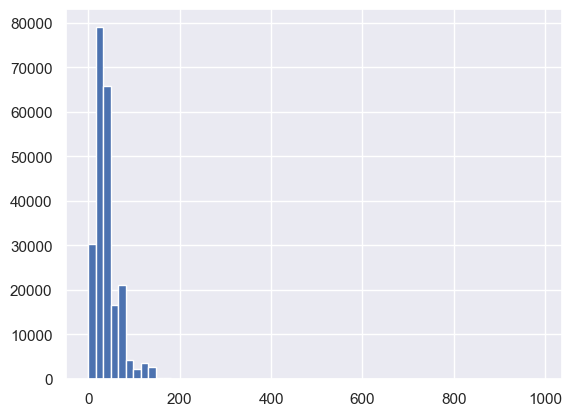

In [8]:
extrusion['ST110_VAREx_0_SDickeIst'].hist(bins=60);

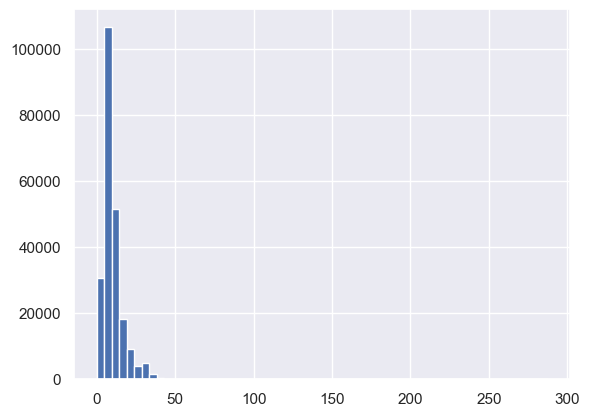

In [9]:
extrusion['ST110_VAREx_1_SDickeIst'].hist(bins=60);

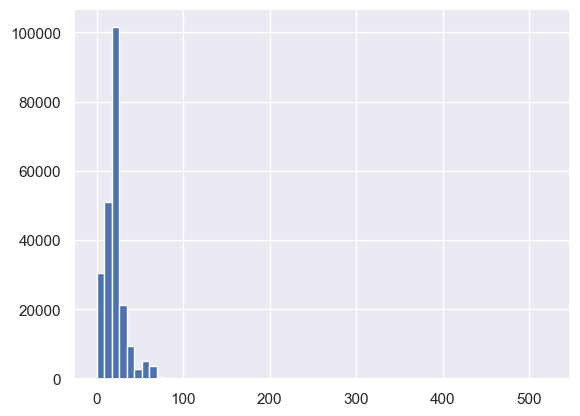

In [10]:
extrusion['ST110_VAREx_2_SDickeIst'].hist(bins=60);

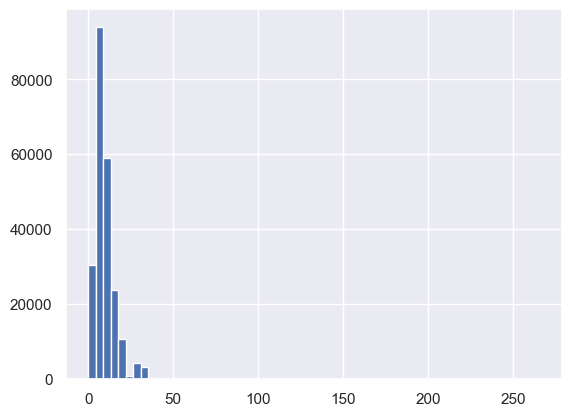

In [11]:
extrusion['ST110_VAREx_3_SDickeIst'].hist(bins=60);

In [12]:
correl_1=extrusion.filter(['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst'],axis=1)
print(correl_1.corr())

                         ST110_VAREx_0_SDickeIst  ST110_VAREx_1_SDickeIst  \
ST110_VAREx_0_SDickeIst                 1.000000                 0.964139   
ST110_VAREx_1_SDickeIst                 0.964139                 1.000000   
ST110_VAREx_2_SDickeIst                 0.976473                 0.887840   
ST110_VAREx_3_SDickeIst                 0.976895                 0.980403   

                         ST110_VAREx_2_SDickeIst  ST110_VAREx_3_SDickeIst  
ST110_VAREx_0_SDickeIst                 0.976473                 0.976895  
ST110_VAREx_1_SDickeIst                 0.887840                 0.980403  
ST110_VAREx_2_SDickeIst                 1.000000                 0.912762  
ST110_VAREx_3_SDickeIst                 0.912762                 1.000000  


In [13]:
#Hence it is observed that if defect is present in 1 Extrusion..it will be present in other section as well

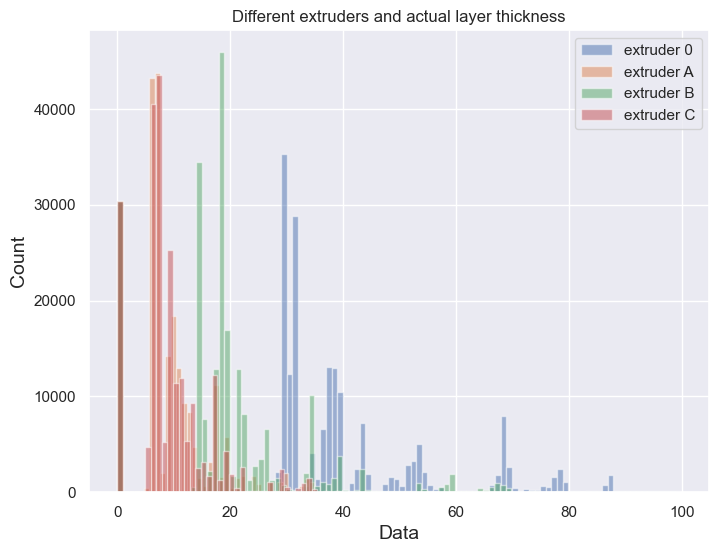

In [14]:
plt.figure(figsize=(8,6))
plt.hist(extrusion[extrusion['ST110_VAREx_0_SDickeIst'] < 100]['ST110_VAREx_0_SDickeIst'], bins=100, alpha=0.5, label="extruder 0")
plt.hist(extrusion[extrusion['ST110_VAREx_1_SDickeIst'] < 100]['ST110_VAREx_1_SDickeIst'], bins=100, alpha=0.5, label="extruder A")
plt.hist(extrusion[extrusion['ST110_VAREx_2_SDickeIst'] < 100]['ST110_VAREx_2_SDickeIst'], bins=100, alpha=0.5, label="extruder B")
plt.hist(extrusion[extrusion['ST110_VAREx_3_SDickeIst'] < 100]['ST110_VAREx_3_SDickeIst'], bins=100, alpha=0.5, label="extruder C")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Different extruders and actual layer thickness")
plt.legend(loc='upper right')


In [15]:
extrusion['EXT0'] = extrusion['ST110_VAREx_0_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)
extrusion['EXT1'] = extrusion['ST110_VAREx_1_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)
extrusion['EXT2'] = extrusion['ST110_VAREx_2_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)
extrusion['EXT3'] = extrusion['ST110_VAREx_3_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)

correl_2=extrusion.filter(['EXT0','EXT1','EXT2','EXT3'],axis=1)
print(correl_2.corr())

          EXT0      EXT1      EXT2      EXT3
EXT0  1.000000  0.998784  0.999144  0.998442
EXT1  0.998784  1.000000  0.998156  0.998670
EXT2  0.999144  0.998156  1.000000  0.997853
EXT3  0.998442  0.998670  0.997853  1.000000


In [16]:
#Thus we observe that if there is defect in one output..others are affected

In [17]:
import pandas as pd

# Convert 'Datum' to datetime format
extrusion['Datum'] = pd.to_datetime(extrusion['Datum'], format='%d.%m.%Y %H:%M')

# Extract date in DD.MM format
extrusion['date'] = extrusion['Datum'].dt.strftime('%d.%m')

# Group by 'date' and calculate the mean for each date
extrusion_daily_mean = extrusion.groupby('date').mean().reset_index()

# Display the result
extrusion_daily_mean.head(20)


,date,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,EXT0,EXT1,EXT2,EXT3
0,01.04,0.0,1.323795,175.923193,1.0,179.542169,0.000000,175.338855,1.0,175.371988,...,78.996988,0.0,54.783133,5.0,15.0,53.088855,0.018072,0.018072,0.018072,0.018072
1,01.06,0.0,0.276692,183.977444,1.0,197.460150,0.000000,183.977444,1.0,184.093233,...,54.472180,0.0,65.992481,5.0,15.0,61.248120,0.061654,0.063158,0.061654,0.063158
2,01.07,0.0,3.333835,192.153383,1.0,199.951880,0.093233,192.156391,1.0,192.085714,...,44.658647,0.0,76.345865,5.0,15.0,68.016541,0.069173,0.069173,0.069173,0.069173
3,01.08,0.0,0.739458,170.027108,1.0,183.376506,0.073795,170.027108,1.0,170.155120,...,71.606928,0.0,64.371988,5.0,15.0,57.123494,0.091867,0.091867,0.091867,0.091867
4,01.09,0.0,0.054135,175.203008,1.0,189.622556,0.000000,175.203008,1.0,175.416541,...,64.294737,0.0,59.661654,5.0,15.0,58.354887,0.012030,0.012030,0.012030,0.012030
5,01.10,0.0,7.824060,182.742857,1.0,189.945865,0.574436,185.124812,1.0,181.299248,...,59.765414,0.0,55.000000,5.0,15.0,46.169925,0.117293,0.117293,0.117293,0.117293
6,01.11,0.0,4.046687,185.000000,1.0,190.165663,0.216867,185.000000,1.0,184.977410,...,75.887048,0.0,63.750000,5.0,15.0,57.897590,0.106928,0.106928,0.106928,0.106928
7,01.12,0.0,0.043609,179.461654,1.0,187.088722,0.000000,179.192481,1.0,179.151880,...,78.228571,0.0,60.000000,5.0,15.0,58.291729,0.015038,0.015038,0.015038,0.015038
8,02.02,0.0,11.206422,162.582569,1.0,154.972477,4.204893,162.920489,1.0,150.756881,...,50.685015,0.0,60.000000,5.0,15.0,34.753823,0.418321,0.418321,0.419847,0.418321
9,02.03,0.0,9.549348,176.834264,1.0,160.942272,4.882682,178.666667,1.0,157.500931,...,51.108007,0.0,64.953445,5.0,15.0,32.817505,0.344444,0.344444,0.344444,0.344444


In [18]:
extrusion['hour'] = extrusion['Datum'].dt.hour
# Group by 'date' and calculate the mean for each date
extrusion_hourly_mean = extrusion.groupby('hour').mean().reset_index()

# Display the result
extrusion_hourly_mean.head(24)


,hour,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,EXT0,EXT1,EXT2,EXT3
0,0,0.0,2.907202,175.794263,1.0,182.542128,0.516609,175.990088,1.0,174.844775,...,59.964043,0.0,68.551230,5.0,15.0,58.645842,0.105957,0.106062,0.106906,0.106062
1,1,0.0,3.129137,176.078806,1.0,182.456026,0.608385,176.286540,1.0,174.678470,...,58.835007,0.0,68.863756,5.0,15.0,57.981926,0.115522,0.115627,0.115522,0.115627
2,2,0.0,3.277201,176.125905,1.0,183.018886,0.776519,176.316231,1.0,175.102927,...,58.172436,0.0,68.752322,5.0,15.0,58.121887,0.124016,0.124121,0.124331,0.124226
3,3,0.0,3.493911,176.255091,1.0,183.603191,0.798026,176.444363,1.0,175.717720,...,56.127442,0.0,68.581776,5.0,15.0,55.721149,0.160403,0.160718,0.160403,0.160508
4,4,0.0,3.922078,175.864579,1.0,183.088919,0.831693,176.056871,1.0,175.875681,...,52.195638,0.0,68.584071,5.0,15.0,52.046460,0.225945,0.226050,0.225945,0.226050
5,5,0.0,4.342965,175.664573,1.0,182.692002,0.917818,175.822131,1.0,175.652638,...,51.377382,0.0,69.470570,5.0,15.0,52.000526,0.220827,0.221350,0.221245,0.221036
6,6,0.0,3.672012,175.977424,1.0,183.583711,0.791223,176.150332,1.0,176.028379,...,53.649830,0.0,70.106430,5.0,15.0,54.657683,0.179603,0.180131,0.179709,0.179603
7,7,0.0,2.978192,175.650646,1.0,184.570083,0.615922,175.832098,1.0,176.065636,...,56.738445,0.0,70.446539,5.0,15.0,58.212886,0.137730,0.137942,0.137836,0.139424
8,8,0.0,2.957199,175.256065,1.0,184.920542,0.542113,175.463291,1.0,176.239326,...,57.402174,0.0,70.026215,5.0,15.0,57.587383,0.134520,0.135791,0.134626,0.135791
9,9,0.0,3.041698,174.964970,1.0,184.620701,0.905916,175.178114,1.0,176.160546,...,57.259740,0.0,69.795295,5.0,15.0,57.639664,0.138745,0.138851,0.139168,0.139274


In [19]:
#As none of the values are showing any major rise in particular time and date..we drop..date, hour and datum columns
extrusion=extrusion.drop(['Datum','date','hour'], axis=1)

In [20]:
for col in extrusion.columns:
    if extrusion[col].nunique() == 1:
        print(col)


ST0_VARActAuftrag
ST110_VARExtr_0_HeizungZone_4_Konfig
ST110_VARExtr_0_HeizungZone_5_Konfig
ST110_VARExtr_0_HeizungZone_6_Konfig
ST110_VARExtr_0_HeizungZone_6_Regler_Y
ST110_VARExtr_0_HeizungZone_7_Konfig
ST110_VARExtr_0_HeizungZone_7_Regler_Y
ST110_VARExtr_0_HeizungZone_8_Konfig
ST110_VARExtr_0_HeizungZone_8_Regler_Y
ST110_VARExtr_0_HeizungZone_9_Konfig
ST110_VARExtr_0_HeizungZone_9_Regler_Y
ST110_VARExtr_1_HeizungZone_1_Konfig
ST110_VARExtr_1_HeizungZone_2_Konfig
ST110_VARExtr_1_HeizungZone_3_Konfig
ST110_VARExtr_1_HeizungZone_4_Konfig
ST110_VARExtr_1_HeizungZone_5_ActEffectPower
ST110_VARExtr_1_HeizungZone_5_Konfig
ST110_VARExtr_1_HeizungZone_5_Regler_Y
ST110_VARExtr_1_HeizungZone_6_ActEffectPower
ST110_VARExtr_1_HeizungZone_6_Konfig
ST110_VARExtr_1_HeizungZone_6_Regler_X
ST110_VARExtr_1_HeizungZone_6_Regler_Y
ST110_VARExtr_1_HeizungZone_7_Konfig
ST110_VARExtr_1_HeizungZone_8_Konfig
ST110_VARExtr_2_HeizungZone_1_Konfig
ST110_VARExtr_2_HeizungZone_2_Konfig
ST110_VARExtr_2_HeizungZone

In [21]:
#We are droppping columns which has only 1 unique value
extrusion = extrusion.loc[:, extrusion.nunique() > 1]
for col in extrusion.columns:
    print(f"Column '{col}' has {extrusion[col].nunique()} unique values")


Column 'ST110_VARExtr_0_HeizungZone_3_Regler_Y' has 101 unique values
Column 'ST110_VARExtr_0_HeizungZone_3_SollTemp' has 54 unique values
Column 'ST110_VARExtr_0_HeizungZone_4_Regler_X' has 240 unique values
Column 'ST110_VARExtr_0_HeizungZone_4_Regler_Y' has 94 unique values
Column 'ST110_VARExtr_0_HeizungZone_4_SollTemp' has 54 unique values
Column 'ST110_VARExtr_0_HeizungZone_5_Regler_X' has 244 unique values
Column 'ST110_VARExtr_0_HeizungZone_5_Regler_Y' has 101 unique values
Column 'ST110_VARExtr_0_HeizungZone_5_SollTemp' has 57 unique values
Column 'ST110_VARExtr_0_HeizungZone_6_Regler_X' has 39 unique values
Column 'ST110_VARExtr_0_HeizungZone_6_SollTemp' has 2 unique values
Column 'ST110_VARExtr_0_HeizungZone_7_Regler_X' has 39 unique values
Column 'ST110_VARExtr_0_HeizungZone_7_SollTemp' has 2 unique values
Column 'ST110_VARExtr_0_HeizungZone_8_Regler_X' has 39 unique values
Column 'ST110_VARExtr_0_HeizungZone_8_SollTemp' has 2 unique values
Column 'ST110_VARExtr_0_HeizungZo

Column 'ST110_VAREx_3_SollLM' has 1649 unique values
Column 'ST110_VARGeblaese_1_Auslastung' has 96 unique values
Column 'ST110_VARGeblaese_2_Auslastung' has 96 unique values
Column 'ST110_VARIBC_1_Ist_n_Calc' has 87 unique values
Column 'ST110_VARIBC_1_Soll_n_Visu' has 67 unique values
Column 'ST110_VARIBC_2_Ist_n_Calc' has 92 unique values
Column 'ST110_VARIBC_2_Soll_n_Visu' has 93 unique values
Column 'ST110_VARIBC_3_Ist_n_Calc' has 83 unique values
Column 'ST110_VARIBC_3_Soll_n_Visu' has 77 unique values
Column 'ST110_VARKorb_dIst_d' has 1340 unique values
Column 'ST110_VARKorb_dSoll_d' has 1112 unique values
Column 'ST110_VARProfilCmdBefehl' has 3 unique values
Column 'ST110_VARProfilCmdMessung' has 2 unique values
Column 'ST110_VARProfilCmdReglerEin' has 2 unique values
Column 'ST110_VARProfilCmdReglerStop' has 2 unique values
Column 'ST110_VARTrichter_10_Vorwahl' has 2 unique values
Column 'ST110_VARTrichter_11_Vorwahl' has 2 unique values
Column 'ST110_VARTrichter_15_Vorwahl' h

In [22]:
extrusion = extrusion.dropna(axis = 0, how = 'any')

In [23]:
#Checking for extrusion
nan_in_extrusion = extrusion.isnull().sum().sum()
 
# Print the dataframe
print(nan_in_extrusion)


0


In [24]:
extrusion1 = extrusion.loc[(extrusion['EXT0'] == 0) & (extrusion['EXT1'] == 0) & (extrusion['EXT2'] == 0) & (extrusion['EXT3'] == 0)]

In [25]:
extrusion1

,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,ST110_VARExtr_0_HeizungZone_5_SollTemp,ST110_VARExtr_0_HeizungZone_6_Regler_X,ST110_VARExtr_0_HeizungZone_6_SollTemp,...,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpTens,ST114_VARWdTensVis,time,EXT0,EXT1,EXT2,EXT3
0,9.0,190.0,193.0,0.0,190.0,190.0,22.0,190.0,32.0,150.0,...,2174.0,1.0,78.0,50.0,53.0,04:40,0,0,0,0
1,9.0,190.0,193.0,0.0,190.0,190.0,23.0,190.0,32.0,150.0,...,2174.0,1.0,81.0,50.0,49.0,04:42,0,0,0,0
2,9.0,190.0,193.0,0.0,190.0,190.0,22.0,190.0,32.0,150.0,...,2174.0,1.0,81.0,50.0,48.0,04:45,0,0,0,0
3,10.0,190.0,193.0,0.0,190.0,190.0,23.0,190.0,32.0,150.0,...,2174.0,1.0,81.0,50.0,50.0,04:47,0,0,0,0
4,11.0,190.0,193.0,0.0,190.0,190.0,23.0,190.0,33.0,150.0,...,2174.0,1.0,81.0,50.0,51.0,04:49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,2.0,165.0,170.0,0.0,165.0,165.0,16.0,165.0,38.0,150.0,...,387.0,1.0,57.0,55.0,51.0,06:36,0,0,0,0
226532,2.0,165.0,170.0,0.0,165.0,165.0,15.0,165.0,38.0,150.0,...,387.0,1.0,56.0,55.0,51.0,06:38,0,0,0,0
226533,2.0,165.0,170.0,0.0,165.0,165.0,15.0,165.0,38.0,150.0,...,387.0,1.0,57.0,55.0,51.0,06:40,0,0,0,0
226534,2.0,165.0,170.0,0.0,165.0,165.0,16.0,165.0,38.0,150.0,...,387.0,1.0,56.0,55.0,51.0,06:42,0,0,0,0


In [26]:
list=extrusion.columns.tolist()
list

['ST110_VARExtr_0_HeizungZone_3_Regler_Y',
 'ST110_VARExtr_0_HeizungZone_3_SollTemp',
 'ST110_VARExtr_0_HeizungZone_4_Regler_X',
 'ST110_VARExtr_0_HeizungZone_4_Regler_Y',
 'ST110_VARExtr_0_HeizungZone_4_SollTemp',
 'ST110_VARExtr_0_HeizungZone_5_Regler_X',
 'ST110_VARExtr_0_HeizungZone_5_Regler_Y',
 'ST110_VARExtr_0_HeizungZone_5_SollTemp',
 'ST110_VARExtr_0_HeizungZone_6_Regler_X',
 'ST110_VARExtr_0_HeizungZone_6_SollTemp',
 'ST110_VARExtr_0_HeizungZone_7_Regler_X',
 'ST110_VARExtr_0_HeizungZone_7_SollTemp',
 'ST110_VARExtr_0_HeizungZone_8_Regler_X',
 'ST110_VARExtr_0_HeizungZone_8_SollTemp',
 'ST110_VARExtr_0_HeizungZone_9_Regler_X',
 'ST110_VARExtr_0_HeizungZone_9_SollTemp',
 'ST110_VARExtr_1_druck_1_IstP',
 'ST110_VARExtr_1_HeizungZone_1_ActEffectPower',
 'ST110_VARExtr_1_HeizungZone_1_Regler_X',
 'ST110_VARExtr_1_HeizungZone_1_Regler_Y',
 'ST110_VARExtr_1_HeizungZone_1_SollTemp',
 'ST110_VARExtr_1_HeizungZone_2_ActEffectPower',
 'ST110_VARExtr_1_HeizungZone_2_Regler_X',
 'ST110_V

In [27]:
extrusion1 = extrusion1.loc[:, extrusion1.nunique() > 1]
list1=extrusion1.columns.tolist()
list1

['ST110_VARExtr_0_HeizungZone_3_Regler_Y',
 'ST110_VARExtr_0_HeizungZone_3_SollTemp',
 'ST110_VARExtr_0_HeizungZone_4_Regler_X',
 'ST110_VARExtr_0_HeizungZone_4_Regler_Y',
 'ST110_VARExtr_0_HeizungZone_4_SollTemp',
 'ST110_VARExtr_0_HeizungZone_5_Regler_X',
 'ST110_VARExtr_0_HeizungZone_5_Regler_Y',
 'ST110_VARExtr_0_HeizungZone_5_SollTemp',
 'ST110_VARExtr_0_HeizungZone_6_Regler_X',
 'ST110_VARExtr_0_HeizungZone_7_Regler_X',
 'ST110_VARExtr_0_HeizungZone_8_Regler_X',
 'ST110_VARExtr_0_HeizungZone_9_Regler_X',
 'ST110_VARExtr_1_druck_1_IstP',
 'ST110_VARExtr_1_HeizungZone_1_ActEffectPower',
 'ST110_VARExtr_1_HeizungZone_1_Regler_X',
 'ST110_VARExtr_1_HeizungZone_1_Regler_Y',
 'ST110_VARExtr_1_HeizungZone_1_SollTemp',
 'ST110_VARExtr_1_HeizungZone_2_ActEffectPower',
 'ST110_VARExtr_1_HeizungZone_2_Regler_X',
 'ST110_VARExtr_1_HeizungZone_2_Regler_Y',
 'ST110_VARExtr_1_HeizungZone_2_SollTemp',
 'ST110_VARExtr_1_HeizungZone_3_ActEffectPower',
 'ST110_VARExtr_1_HeizungZone_3_Regler_X',
 'S

In [28]:
difference = [item for item in list if item not in list1]
print(difference)


['ST110_VARExtr_0_HeizungZone_6_SollTemp', 'ST110_VARExtr_0_HeizungZone_7_SollTemp', 'ST110_VARExtr_0_HeizungZone_8_SollTemp', 'ST110_VARExtr_0_HeizungZone_9_SollTemp', 'ST110_VARExtr_1_HeizungZone_5_SollTemp', 'ST110_VARExtr_1_HeizungZone_6_SollTemp', 'ST110_VARExtr_2_HeizungZone_6_SollTemp', 'ST110_VARExtr_3_HeizungZone_5_SollTemp', 'ST110_VARExtr_3_HeizungZone_6_SollTemp', 'ST110_VAREx_1_MischerMotor', 'ST110_VAREx_2_Dos_0_Ventil', 'ST110_VAREx_2_MischerMotor', 'ST114_VARDiaShaft', 'EXT0', 'EXT1', 'EXT2', 'EXT3']


In [29]:
#We replace 'EXT0', 'EXT1', 'EXT2', 'EXT3'with 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst'
difference=['ST110_VARExtr_0_HeizungZone_6_SollTemp', 'ST110_VARExtr_0_HeizungZone_7_SollTemp', 'ST110_VARExtr_0_HeizungZone_8_SollTemp', 'ST110_VARExtr_0_HeizungZone_9_SollTemp', 'ST110_VARExtr_1_HeizungZone_5_SollTemp', 'ST110_VARExtr_1_HeizungZone_6_SollTemp', 'ST110_VARExtr_2_HeizungZone_6_SollTemp', 'ST110_VARExtr_3_HeizungZone_5_SollTemp', 'ST110_VARExtr_3_HeizungZone_6_SollTemp', 'ST110_VAREx_1_MischerMotor', 'ST110_VAREx_2_Dos_0_Ventil', 'ST110_VAREx_2_MischerMotor', 'ST114_VARDiaShaft', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']

In [30]:
#the items in difference indicate that defects arise when values of the following changes...let us verify the same
extrusion_selected = extrusion[difference]
extrusion_selected

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,28.9,5.7,17.3,6.0
1,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,29.0,5.8,17.4,5.8
2,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,29.0,5.8,17.4,5.8
3,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,28.9,5.8,17.4,5.8
4,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,29.1,5.8,17.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,38.8,9.7,19.2,9.8
226532,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,39.1,9.7,19.6,9.8
226533,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,39.2,9.7,19.6,9.8
226534,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,2.0,2.0,2.0,0.0,38.8,9.7,19.3,9.7


In [31]:
ST110_VARExtr_0_HeizungZone_7_SollTemp = extrusion_selected.groupby('ST110_VARExtr_0_HeizungZone_7_SollTemp').mean().reset_index()
ST110_VARExtr_0_HeizungZone_7_SollTemp[['ST110_VARExtr_0_HeizungZone_7_SollTemp', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]

,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,100.0,0.000000,0.000000,0.000000,0.000000
1,150.0,40.492705,9.858572,20.941292,9.695053


In [32]:
ST110_VARExtr_0_HeizungZone_6_SollTemp = extrusion_selected.groupby('ST110_VARExtr_0_HeizungZone_6_SollTemp').mean().reset_index()
ST110_VARExtr_0_HeizungZone_6_SollTemp[['ST110_VARExtr_0_HeizungZone_6_SollTemp', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,100.0,0.000000,0.000000,0.000000,0.000000
1,150.0,40.492705,9.858572,20.941292,9.695053


In [33]:
correl_3=extrusion_selected.corr()
print(correl_3)

                                        ST110_VARExtr_0_HeizungZone_6_SollTemp  \
ST110_VARExtr_0_HeizungZone_6_SollTemp                                1.000000   
ST110_VARExtr_0_HeizungZone_7_SollTemp                                1.000000   
ST110_VARExtr_0_HeizungZone_8_SollTemp                                1.000000   
ST110_VARExtr_0_HeizungZone_9_SollTemp                                1.000000   
ST110_VARExtr_1_HeizungZone_5_SollTemp                                0.866673   
ST110_VARExtr_1_HeizungZone_6_SollTemp                                0.866673   
ST110_VARExtr_2_HeizungZone_6_SollTemp                                0.866673   
ST110_VARExtr_3_HeizungZone_5_SollTemp                                0.866673   
ST110_VARExtr_3_HeizungZone_6_SollTemp                                0.866673   
ST110_VAREx_1_MischerMotor                                            0.215047   
ST110_VAREx_2_Dos_0_Ventil                                           -0.000351   
ST110_VAREx_2_Mi

In [34]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_0_HeizungZone_6_SollTemp'] != extrusion_selected['ST110_VARExtr_0_HeizungZone_7_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [35]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_0_HeizungZone_6_SollTemp'] != extrusion_selected['ST110_VARExtr_0_HeizungZone_8_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [36]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_0_HeizungZone_6_SollTemp'] != extrusion_selected['ST110_VARExtr_0_HeizungZone_9_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [37]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_0_HeizungZone_6_SollTemp'] != extrusion_selected['ST110_VARExtr_0_HeizungZone_9_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [38]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_1_HeizungZone_5_SollTemp'] != extrusion_selected['ST110_VARExtr_1_HeizungZone_6_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [39]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_1_HeizungZone_5_SollTemp'] != extrusion_selected['ST110_VARExtr_2_HeizungZone_6_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [40]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_1_HeizungZone_5_SollTemp'] != extrusion_selected['ST110_VARExtr_3_HeizungZone_5_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [41]:
extrusion_selected1 = extrusion_selected[extrusion_selected['ST110_VARExtr_1_HeizungZone_5_SollTemp'] != extrusion_selected['ST110_VARExtr_3_HeizungZone_6_SollTemp']]
extrusion_selected1.head()

,ST110_VARExtr_0_HeizungZone_6_SollTemp,ST110_VARExtr_0_HeizungZone_7_SollTemp,ST110_VARExtr_0_HeizungZone_8_SollTemp,ST110_VARExtr_0_HeizungZone_9_SollTemp,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VARExtr_1_HeizungZone_6_SollTemp,ST110_VARExtr_2_HeizungZone_6_SollTemp,ST110_VARExtr_3_HeizungZone_5_SollTemp,ST110_VARExtr_3_HeizungZone_6_SollTemp,ST110_VAREx_1_MischerMotor,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_2_MischerMotor,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst


In [42]:
ST110_VARExtr_1_HeizungZone_5_SollTemp = extrusion_selected.groupby('ST110_VARExtr_1_HeizungZone_5_SollTemp').mean().reset_index()
ST110_VARExtr_1_HeizungZone_5_SollTemp[['ST110_VARExtr_1_HeizungZone_5_SollTemp', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]

,ST110_VARExtr_1_HeizungZone_5_SollTemp,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,100.0,0.000000,0.000000,0.00000,0.000000
1,150.0,40.790422,9.931056,21.09526,9.766335


In [43]:
ST110_VAREx_1_MischerMotor = extrusion_selected.groupby('ST110_VAREx_1_MischerMotor').mean().reset_index()
ST110_VAREx_1_MischerMotor[['ST110_VAREx_1_MischerMotor', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]

,ST110_VAREx_1_MischerMotor,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,0.0,0.293062,0.000000,0.237335,0.055727
1,2.0,39.718201,9.670587,20.540051,9.509733


In [44]:
ST114_VARDiaShaft = extrusion_selected.groupby('ST114_VARDiaShaft').mean().reset_index()
ST114_VARDiaShaft[['ST114_VARDiaShaft', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]




,ST114_VARDiaShaft,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,0.0,39.402531,9.593153,20.377496,9.434036
1,1.0,0.000000,0.000000,0.000000,0.000000


In [45]:
ST110_VAREx_2_Dos_0_Ventil = extrusion_selected.groupby('ST110_VAREx_2_Dos_0_Ventil').mean().reset_index()
ST110_VAREx_2_Dos_0_Ventil[['ST110_VAREx_2_Dos_0_Ventil', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]


,ST110_VAREx_2_Dos_0_Ventil,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,0.0,0.000000,0.000000,0.000000,0.000000
1,2.0,39.400783,9.592727,20.376592,9.433618


In [46]:
ST110_VAREx_2_MischerMotor = extrusion_selected.groupby('ST110_VAREx_2_MischerMotor').mean().reset_index()
ST110_VAREx_2_MischerMotor[['ST110_VAREx_2_MischerMotor', 'ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst','ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst']]

,ST110_VAREx_2_MischerMotor,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,0.0,0.000000,0.000000,0.000000,0.000000
1,2.0,39.519113,9.621536,20.437787,9.461949


In [47]:
#REmoving difference columns from extrusion dataframe
list2=['ST110_VARExtr_0_HeizungZone_6_SollTemp', 'ST110_VARExtr_0_HeizungZone_7_SollTemp', 'ST110_VARExtr_0_HeizungZone_8_SollTemp', 'ST110_VARExtr_0_HeizungZone_9_SollTemp', 'ST110_VARExtr_1_HeizungZone_5_SollTemp', 'ST110_VARExtr_1_HeizungZone_6_SollTemp', 'ST110_VARExtr_2_HeizungZone_6_SollTemp', 'ST110_VARExtr_3_HeizungZone_5_SollTemp', 'ST110_VARExtr_3_HeizungZone_6_SollTemp', 'ST110_VAREx_1_MischerMotor', 'ST110_VAREx_2_Dos_0_Ventil', 'ST110_VAREx_2_MischerMotor', 'ST114_VARDiaShaft']
extrusion = extrusion.drop(columns=list2)
extrusion

,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,ST110_VARExtr_0_HeizungZone_5_SollTemp,ST110_VARExtr_0_HeizungZone_6_Regler_X,ST110_VARExtr_0_HeizungZone_7_Regler_X,...,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpTens,ST114_VARWdTensVis,time,EXT0,EXT1,EXT2,EXT3
0,9.0,190.0,193.0,0.0,190.0,190.0,22.0,190.0,32.0,34.0,...,2174.0,1.0,78.0,50.0,53.0,04:40,0,0,0,0
1,9.0,190.0,193.0,0.0,190.0,190.0,23.0,190.0,32.0,34.0,...,2174.0,1.0,81.0,50.0,49.0,04:42,0,0,0,0
2,9.0,190.0,193.0,0.0,190.0,190.0,22.0,190.0,32.0,34.0,...,2174.0,1.0,81.0,50.0,48.0,04:45,0,0,0,0
3,10.0,190.0,193.0,0.0,190.0,190.0,23.0,190.0,32.0,34.0,...,2174.0,1.0,81.0,50.0,50.0,04:47,0,0,0,0
4,11.0,190.0,193.0,0.0,190.0,190.0,23.0,190.0,33.0,34.0,...,2174.0,1.0,81.0,50.0,51.0,04:49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,2.0,165.0,170.0,0.0,165.0,165.0,16.0,165.0,38.0,40.0,...,387.0,1.0,57.0,55.0,51.0,06:36,0,0,0,0
226532,2.0,165.0,170.0,0.0,165.0,165.0,15.0,165.0,38.0,40.0,...,387.0,1.0,56.0,55.0,51.0,06:38,0,0,0,0
226533,2.0,165.0,170.0,0.0,165.0,165.0,15.0,165.0,38.0,40.0,...,387.0,1.0,57.0,55.0,51.0,06:40,0,0,0,0
226534,2.0,165.0,170.0,0.0,165.0,165.0,16.0,165.0,38.0,40.0,...,387.0,1.0,56.0,55.0,51.0,06:42,0,0,0,0


In [48]:
extrusion2=extrusion.loc[(extrusion['EXT0'] != 0) | (extrusion['EXT1'] != 0) | (extrusion['EXT2'] != 0) | (extrusion['EXT3'] != 0)]

In [49]:
extrusion2

,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,ST110_VARExtr_0_HeizungZone_5_SollTemp,ST110_VARExtr_0_HeizungZone_6_Regler_X,ST110_VARExtr_0_HeizungZone_7_Regler_X,...,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpTens,ST114_VARWdTensVis,time,EXT0,EXT1,EXT2,EXT3
183,11.0,190.0,193.0,0.0,190.0,190.0,17.0,190.0,38.0,40.0,...,2196.0,0.0,0.0,53.0,1.0,11:17,1,1,1,1
184,9.0,190.0,193.0,0.0,190.0,190.0,21.0,190.0,38.0,40.0,...,2196.0,0.0,0.0,53.0,1.0,11:19,1,1,1,1
185,10.0,190.0,193.0,0.0,190.0,190.0,25.0,190.0,38.0,40.0,...,2196.0,0.0,0.0,53.0,2.0,11:21,1,1,1,1
186,12.0,190.0,193.0,0.0,190.0,190.0,24.0,190.0,38.0,40.0,...,2196.0,0.0,0.0,53.0,0.0,11:23,1,1,1,1
187,11.0,190.0,193.0,0.0,190.0,190.0,22.0,190.0,38.0,40.0,...,2196.0,0.0,0.0,53.0,4.0,11:25,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226231,17.0,176.0,177.0,0.0,176.0,175.0,21.0,175.0,41.0,43.0,...,379.0,0.0,0.0,65.0,10.0,19:46,1,1,1,1
226232,16.0,176.0,176.0,1.0,176.0,175.0,21.0,175.0,41.0,43.0,...,379.0,0.0,0.0,65.0,20.0,19:48,1,1,1,1
226233,18.0,176.0,176.0,1.0,176.0,175.0,22.0,175.0,41.0,43.0,...,379.0,0.0,0.0,65.0,20.0,19:50,1,1,1,1
226234,18.0,176.0,176.0,1.0,176.0,175.0,22.0,175.0,41.0,42.0,...,379.0,0.0,0.0,65.0,20.0,19:52,1,1,1,1
